# Proyecto Final - Visualizaciones en Python  
## Primera Entrega  
### Archivo: ProyectoDS_ParteI_TuApellido.ipynb

---

## 📌 Abstract

Este proyecto utiliza el dataset “Netflix Movies and TV Shows” proveniente de Kaggle, que contiene más de 8.000 títulos disponibles en la plataforma hasta 2021. La base de datos incluye tanto películas como series, con información sobre país de origen, fecha de lanzamiento, duración, géneros, actores, directores y clasificación por edad.

El objetivo del proyecto es explorar los contenidos de Netflix desde una perspectiva descriptiva y visual, respondiendo preguntas de interés sobre la oferta de títulos, su evolución a lo largo del tiempo y su distribución por tipo, género y país. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como Matplotlib, Seaborn y pandas.

Se comienza con una limpieza básica y detección de valores faltantes, seguida de visualizaciones que permiten responder preguntas clave. Este análisis exploratorio permitirá sentar las bases para futuros trabajos de predicción, segmentación o recomendaciones basadas en contenido.

---

## ❓ Preguntas / Hipótesis de interés

1. ¿Qué tipo de contenido (películas o series) predomina en Netflix?
2. ¿Cómo ha evolucionado la cantidad de títulos agregados a Netflix a lo largo del tiempo?
3. ¿Qué géneros son más populares y varían según el tipo de contenido?
4. ¿Qué países aportan más contenido al catálogo de Netflix?
5. ¿Existen diferencias en la duración media entre películas y series?


## Objetivo del Proyecto

El objetivo de este proyecto es desarrollar un modelo predictivo que permita estimar la duración de una película o título audiovisual a partir de sus características más relevantes, tales como el tipo (película, serie, documental, etc.), el país de producción, el género y la clasificación por edades. Esta predicción facilitará el análisis de producción y la segmentación de contenidos, ayudando a entender cómo estas variables influyen en la duración de los títulos, y podrá servir como base para optimizar la planificación y creación de contenido audiovisual.



## 📊 Visualizaciones y Análisis


In [113]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('./storage/netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Missing Values

In [114]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


director      2634
country        831
cast           825
date_added      10
rating           4
duration         3
dtype: int64

👉 Se observa que hay valores faltantes en columnas como `director`, `cast`, `country`. Se dejarán o imputarán según necesidad del análisis.


### 📈 2. Análisis Univariado

#### Cantidad de títulos por tipo


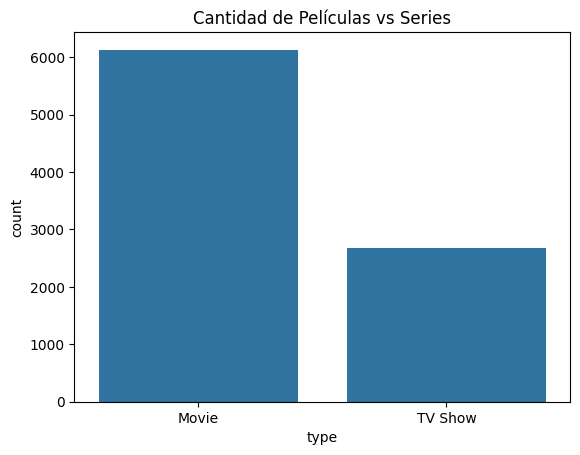

In [115]:

sns.countplot(x='type', data=df)
plt.title('Cantidad de Películas vs Series')
plt.show()



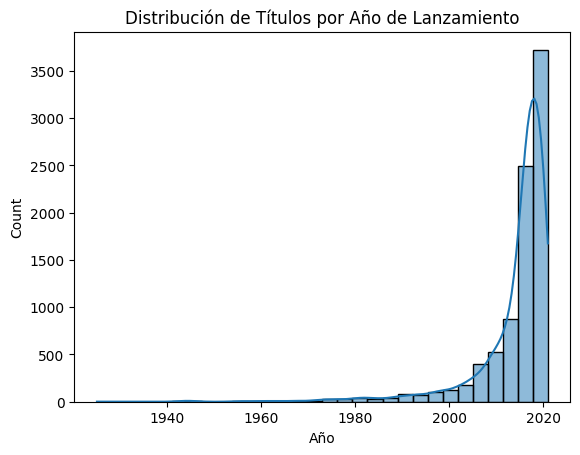

In [116]:
#### Distribución de años de lanzamiento
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribución de Títulos por Año de Lanzamiento')
plt.xlabel('Año')
plt.show()


### 🔀 3. Análisis Bivariado
#### Títulos agregados por año y tipo

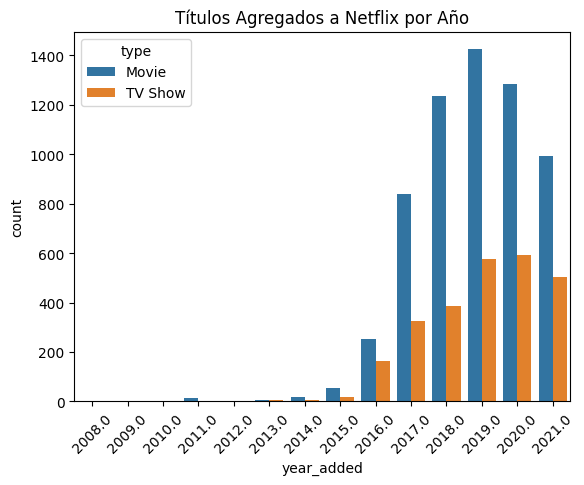

In [117]:
df['date_added'] = pd.to_datetime(df['date_added'],format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year

sns.countplot(data=df, x='year_added', hue='type')
plt.xticks(rotation=45)
plt.title('Títulos Agregados a Netflix por Año')
plt.show()



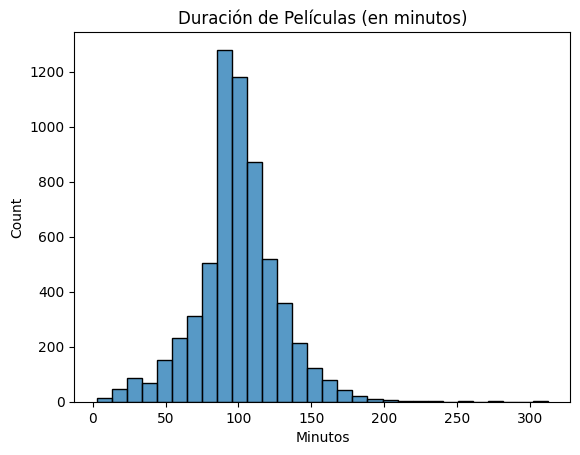

In [118]:
#### Duración promedio por tipo
df_duration = df[df['type'] == 'Movie'].copy()
df_duration['duration_int'] = df_duration['duration'].str.extract(r'(\d+)').astype(float)

sns.histplot(data=df_duration, x='duration_int', bins=30)
plt.title('Duración de Películas (en minutos)')
plt.xlabel('Minutos')
plt.show()




### 🔁 4. Análisis Multivariado

#### País vs Tipo vs Género


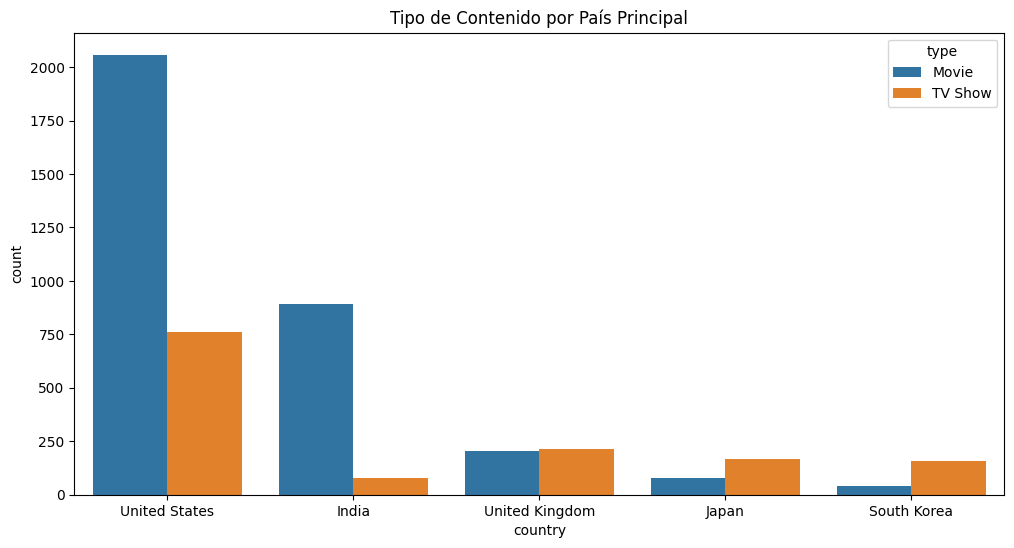

In [119]:

top_countries = df['country'].value_counts().head(5).index
df_top = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='country', hue='type')
plt.title('Tipo de Contenido por País Principal')
plt.show()


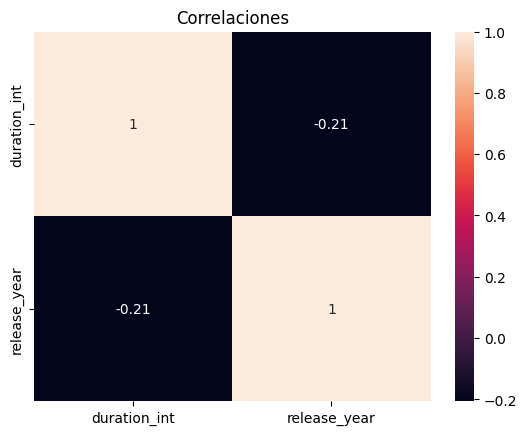

In [120]:

#### Heatmap de correlaciones (si hay variables numéricas)

# Preparar si se convierte duración a número
df_corr = df_duration[['duration_int', 'release_year']].dropna()
sns.heatmap(df_corr.corr(), annot=True)
plt.title('Correlaciones')
plt.show()




## ✅ Conclusiones preliminares

* Netflix tiene más películas que series, aunque el número de series crece en los últimos años.
* El catálogo de títulos aumentó considerablemente entre 2016 y 2020.
* Los países que más aportan títulos son Estados Unidos, India y Reino Unido.
* Las películas tienen una duración promedio entre 80 y 120 minutos.
* Algunos géneros se asocian más a un tipo de contenido (por ejemplo, “Children” a series).




## Acciones que podria realizar para mi dataset

In [121]:
# Eliminar columnas con muchos valores faltantes o poco informativas
df.drop(columns=['director', 'cast', 'description'], inplace=True)

# Imputar valores faltantes razonables
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year


C:\Users\Practical Tecno\AppData\Local\Temp\ipykernel_15336\1677973370.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
C:\Users\Practical Tecno\AppData\Local\Temp\ipykernel_15336\1677973370.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [122]:
# Separar duración de películas y series
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Convertir a minutos para películas, temporadas para series
df['duration_type'] = df['duration'].str.extract('(min|Season|Seasons)', expand=False)


In [123]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,year_added,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,90.0,min
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0,2.0,Season
2,s3,TV Show,Ganglands,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021.0,1.0,Season
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0,2.0,Season
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019.0,158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",2019.0,2.0,Season
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",2019.0,88.0,min
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",2020.0,88.0,min


## Aplicar algun metodo de Outliers Detection

In [124]:
original_size = df.shape[0]
print(f"Tamaño original del dataset: {original_size}")

Tamaño original del dataset: 8807


La fórmula:

$$
\text{Límite inferior} = Q1 - 1.5 \times IQR \\
\text{Límite superior} = Q3 + 1.5 \times IQR
$$

proviene de una **regla empírica** utilizada para detectar outliers basada en el **rango intercuartílico (IQR)**. A continuación te explico por qué se usa:

---

### 📐 ¿Qué es el IQR?

El **IQR** (Interquartile Range) es la diferencia entre el tercer cuartil (Q3, percentil 75) y el primer cuartil (Q1, percentil 25):

$$
\text{IQR} = Q3 - Q1
$$

Este valor representa el **rango central del 50% de los datos**. Es una medida robusta de dispersión porque no se ve afectada por valores extremos.

---

### 🧠 ¿Por qué multiplicar por 1.5?

El **factor 1.5** es una convención estadística popularizada por **Tukey** (el creador del boxplot). Es una forma de determinar qué tan lejos un valor debe estar de la zona "normal" (Q1 a Q3) para considerarse un **outlier**. En palabras simples:

* **Si un valor está más allá de 1.5 veces el IQR por debajo de Q1 o por encima de Q3**, se asume que está demasiado lejos para formar parte de la distribución central.

Esto no tiene una base teórica rígida como una distribución normal, pero **funciona bien en la práctica para muchos tipos de datos**.

---

### 📊 ¿Y por qué no usar media y desviación estándar?

Porque la media y la desviación estándar **no son robustas a outliers**. Si tenés valores extremos, pueden **distorsionar** la media y hacer que el análisis pierda precisión.

---

### 📌 En resumen:

* `Q1 - 1.5 × IQR` y `Q3 + 1.5 × IQR` definen un **rango razonable de variación** de los datos.
* Valores fuera de ese rango son **posibles outliers**.
* Es un enfoque **no paramétrico**, robusto, y muy útil en análisis exploratorios.




**Con IQR (Interquartile Range)**

In [125]:
df_only_movies = df[df['type'] == 'Movie']

In [126]:

Q1 = df_only_movies['duration_num'].quantile(0.25)
Q3 = df_only_movies['duration_num'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_only_movies_iqr = df_only_movies[(df_only_movies['duration_num'] >= lower_bound) & (df_only_movies['duration_num'] <= upper_bound)]
iqr_size = df_only_movies_iqr.shape[0]
iqr_removed = original_size - iqr_size

print(f"Con IQR:")
print(f"  Tamaño final: {iqr_size}")
print(f"  Registros eliminados: {iqr_removed} ({100 * iqr_removed/original_size:.2f}%)")



Con IQR:
  Tamaño final: 5678
  Registros eliminados: 3129 (35.53%)


In [127]:
df_only_movies

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,year_added,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,90.0,min
6,s7,Movie,My Little Pony: A New Generation,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,2021.0,91.0,min
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021.0,125.0,min
9,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021.0,104.0,min
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",2021.0,127.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",2016.0,96.0,min
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019.0,158.0,min
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",2019.0,88.0,min
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",2020.0,88.0,min


**Con Z-Score**


In [128]:
from scipy.stats import zscore

df_only_movies['z_score'] = zscore(df_only_movies['duration_num'])


C:\Users\Practical Tecno\AppData\Local\Temp\ipykernel_15336\2004416882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_movies['z_score'] = zscore(df_only_movies['duration_num'])


In [129]:
df_only_movies.isna().sum()

show_id             0
type                0
title               0
country             0
date_added          0
release_year        0
rating              0
duration            3
listed_in           0
year_added          0
duration_num        3
duration_type       3
z_score          6131
dtype: int64

In [130]:
df_only_movies['duration_num'] = df_only_movies['duration_num'].fillna(df_only_movies['duration_num'].median())


C:\Users\Practical Tecno\AppData\Local\Temp\ipykernel_15336\2798142182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_movies['duration_num'] = df_only_movies['duration_num'].fillna(df_only_movies['duration_num'].median())


In [131]:
df_only_movies.isna().sum()

show_id             0
type                0
title               0
country             0
date_added          0
release_year        0
rating              0
duration            3
listed_in           0
year_added          0
duration_num        0
duration_type       3
z_score          6131
dtype: int64

In [132]:
df_only_movies['z_score'] = zscore(df_only_movies['duration_num'])


C:\Users\Practical Tecno\AppData\Local\Temp\ipykernel_15336\409254875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_movies['z_score'] = zscore(df_only_movies['duration_num'])


In [133]:
df_only_movies.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,year_added,duration_num,duration_type,z_score
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,90.0,min,-0.338612
6,s7,Movie,My Little Pony: A New Generation,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,2021.0,91.0,min,-0.303253
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021.0,125.0,min,0.898951
9,s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021.0,104.0,min,0.156413
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",2021.0,127.0,min,0.969669


In [134]:

# Cambia el umbral a 3 para conservar más datos
df_only_movies_zscore = df_only_movies[df_only_movies['z_score'].abs() <= 4]

zscore_size = df_only_movies_zscore.shape[0]
zscore_removed = original_size - zscore_size

print(f"\nCon Z-Score:")
print(f"  Tamaño final: {zscore_size}")
print(f"  Registros eliminados: {zscore_removed} ({100 * zscore_removed/original_size:.2f}%)")



Con Z-Score:
  Tamaño final: 6121
  Registros eliminados: 2686 (30.50%)


In [135]:
summary = pd.DataFrame({
    'Método': ['Original', 'IQR', 'Z-Score'],
    'Registros': [original_size, iqr_size, zscore_size],
    'Eliminados': [0, iqr_removed, zscore_removed],
    'Reducción (%)': [0, 100 * iqr_removed / original_size, 100 * zscore_removed / original_size]
})

print("\nResumen comparativo:")
print(summary)



Resumen comparativo:
     Método  Registros  Eliminados  Reducción (%)
0  Original       8807           0       0.000000
1       IQR       5678        3129      35.528557
2   Z-Score       6121        2686      30.498467


# Pasos para el desarrollo del proyecto final


## Paso 1: Preparar datos para regresión

* Variable dependiente: `duration_num` (duración en minutos o similar)
* Variables predictoras (features):

  * `type` (puede ser categórica: película, serie, etc.)
  * `country` (país o países, se puede tratar como categórica)
  * `genre` (género, categórica)
  * `rating` (clasificación, categórica o ordinal)

---

## Paso 2: Preprocesamiento

* Limpiar valores faltantes en `duration_num` (ya viste cómo imputar con mediana).
* Verificar y tratar valores faltantes en variables predictoras (pueden imputarse con "Unknown" o eliminar filas).
* Convertir variables categóricas en variables numéricas con one-hot encoding o target encoding.
* Verificar y eliminar o imputar outliers en la variable target (`duration_num`).
* Escalar variables numéricas si usás modelos sensibles a escala (ej. regresión lineal con regularización).

---

## Paso 3: Análisis exploratorio (EDA)

* Distribución de duración por tipo, país, género y rating (boxplots, violin plots).
* Correlaciones o importancia de features con duración.
* Identificación de outliers.

---

## Paso 4: Entrenamiento de modelo

* Modelos a probar:

  * Regresión lineal múltiple
  * Random Forest Regressor
  * Gradient Boosting (XGBoost, LightGBM)
  * Regresores con regularización (Ridge, Lasso)
* Evaluar con métricas: MAE, RMSE, R2.
* Validación cruzada para robustez.

---

## Paso 5: Interpretación y conclusiones

* ¿Qué variables tienen mayor impacto en duración?
* ¿Cuál es el error promedio del modelo?
* ¿Se ajusta bien para diferentes tipos y géneros?


## Tabla Resumen

| Paso                      | Detalle                                                                                      |
|---------------------------|----------------------------------------------------------------------------------------------|
| **Paso 1: Preparar datos para regresión** | - Variable dependiente: `duration_num` (duración en minutos) <br> - Variables predictoras: `type`, `country`, `genre`, `rating` (todas categóricas o categóricas ordinales) |
| **Paso 2: Preprocesamiento**               | - Imputar valores faltantes en `duration_num` (mediana) <br> - Tratar valores faltantes en variables predictoras (imputar "Unknown" o eliminar) <br> - Codificar variables categóricas (one-hot encoding o target encoding) <br> - Detectar y tratar outliers en `duration_num` <br> - Escalar variables numéricas si es necesario |
| **Paso 3: Análisis exploratorio (EDA)**   | - Visualizar distribución de duración por variables categóricas (boxplots, violin plots) <br> - Analizar correlaciones/importancia de features <br> - Identificar outliers |
| **Paso 4: Entrenamiento de modelo**        | - Probar modelos: regresión lineal múltiple, Random Forest, Gradient Boosting, Ridge, Lasso <br> - Evaluar con MAE, RMSE, R² <br> - Validación cruzada para robustez |
| **Paso 5: Interpretación y conclusiones** | - Identificar variables con mayor impacto <br> - Evaluar error promedio del modelo <br> - Analizar desempeño según tipo y género |
